In [75]:
# import stuff
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as s
import random
from collections import Counter
import copy
import tqdm
from sklearn.metrics import confusion_matrix

In [37]:
pokemon = pd.read_csv('data/pokemon.csv', header = None, 
                     skiprows=1, encoding = 'latin-1', low_memory = False,
                    names = ['Name', 'Version', 'Primary Type' ,'Secondary Type','Stage', 'Attack', 'Defense' , 'HP', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Total','Lengendary']
)

In [38]:
pokemon

,Name,Version,Primary Type,Secondary Type,Stage,Attack,Defense,HP,Sp. Attack,Sp. Defense,Speed,Total,Lengendary
0,Bulbasaur,NaN,GRASS,POISON,1,49,49,45,65,65,45,318,N
1,Ivysaur,NaN,GRASS,POISON,2,62,63,60,80,80,60,405,N
2,Venusaur,NaN,GRASS,POISON,3,82,83,80,100,100,80,525,N
3,Venusaur,Mega Venusaur,GRASS,POISON,3,100,123,80,122,120,80,625,N
4,Charmander,NaN,FIRE,NaN,1,52,43,39,60,50,65,309,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Glastrier,NaN,ICE,NaN,1,145,130,100,65,110,30,580,Y
1041,Spectrier,NaN,GHOST,NaN,1,65,60,100,145,80,130,580,Y
1042,Calyrex,NaN,PSYCHIC,GRASS,1,80,80,100,80,80,80,500,Y
1043,Calyrex,Ice Rider,PSYCHIC,ICE,2,165,150,100,85,130,50,680,Y


In [39]:
noMega = pokemon[pokemon['Version'].isnull()]
noMega

,Name,Version,Primary Type,Secondary Type,Stage,Attack,Defense,HP,Sp. Attack,Sp. Defense,Speed,Total,Lengendary
0,Bulbasaur,NaN,GRASS,POISON,1,49,49,45,65,65,45,318,N
1,Ivysaur,NaN,GRASS,POISON,2,62,63,60,80,80,60,405,N
2,Venusaur,NaN,GRASS,POISON,3,82,83,80,100,100,80,525,N
4,Charmander,NaN,FIRE,NaN,1,52,43,39,60,50,65,309,N
5,Charmeleon,NaN,FIRE,NaN,2,64,58,58,80,65,80,405,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,Regieleki,NaN,ELECTRIC,NaN,1,100,50,80,100,50,200,580,Y
1039,Regidrago,NaN,DRAGON,NaN,1,100,50,200,100,50,80,580,Y
1040,Glastrier,NaN,ICE,NaN,1,145,130,100,65,110,30,580,Y
1041,Spectrier,NaN,GHOST,NaN,1,65,60,100,145,80,130,580,Y


In [5]:
# Class with internal parameter k and methods train and predict
class KNN:
    def __init__(self, k):
        self.k = k
        
    # i.The train method should take in an array of pre-labeled data and store them to be used in the kNN calculation later.
    # training the algorithm based on already found data
    def train(self, knn_set, labels):
        self.knn_set = knn_set
        self.labels = labels
        
    # ii. The predict method should take in a single data point (of the same dimension as those used in training) 
    # and return the label of the kNN decision. Keep in mind that, in general, you may have to choose between multiple labels. 
    # In this case, ties are possible, but you can just decide to break them randomly or increase k to get more votes
    # send in a test point for it to be classified
    def predict(self, x):
        # need to find k closest neighbors to the point w the Euclidean norm
        # pair up each distance with the label of its point
        distances = [ (norm(x - self.knn_set[i]), self.labels[i]) for i in range(len(self.knn_set))]
        #print('Distances: ', distances)
        
        # order all the distances
        k_nearest = sorted(distances)
        k_nearest = k_nearest[:self.k]
        #print('k_nearest: ', distances)
        
        # determine the labels of the top k points & do majority vote
        f = (Counter([p[1] for p in k_nearest]))
        return f
 

In [6]:
def norm(x):
    return np.sqrt(np.sum(x**2))

In [7]:
# PREDICTING THE STAGE OF A POKEMON BY HP AND TOTAL

k = 3
knn = KNN(3)

knn_set = noMega[['HP', 'Total']].to_numpy()
labels = noMega['Stage'].values 

knn.train(knn_set, labels)

random_pokemon = [70,550]
pred = knn.predict(random_pokemon)


print(f'The predicted stage of the random pokemon {random_pokemon} is ~> Stage {pred.most_common(1)[0][0]}')



The predicted stage of the random pokemon [70, 550] is ~> Stage 3


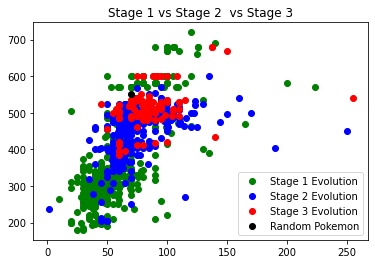

In [8]:
# SPLIT INTO OUR THREE STAGES 
stage_one = noMega[noMega['Stage'] == 1]
stage_two = noMega[noMega['Stage'] == 2]
stage_three = noMega[noMega['Stage'] == 3]

#PLOTTING
plt.scatter(x = stage_one['HP'], y = stage_one['Total'], color = 'g')
plt.scatter(x = stage_two['HP'], y = stage_two['Total'], color = 'b')
plt.scatter(x = stage_three['HP'], y = stage_three['Total'], color = 'r')
plt.scatter(x = random_pokemon[0], y = random_pokemon[1], color = 'black')

# EDITING PLOT
plt.title('Stage 1 vs Stage 2  vs Stage 3')
plt.legend(['Stage 1 Evolution', 'Stage 2 Evolution', 'Stage 3 Evolution', 'Random Pokemon'])

In [78]:
def divideSets(p,data):
    copydata = copy.deepcopy(data)
    np.random.shuffle(copydata)
    list1 = copydata[:int(p*len(copydata))]
    list2 = copydata[int(p*len(copydata)):]
    return (list1,list2)


stages = noMega[['Total', 'Stage']].to_numpy()

p = 0.6
n = len(noMega['Total'])
rets = divideSets(p, stages)
list1 = rets[0]
list2 = rets[1]

data1 = [t[0] for t in list1]
print('\n Total Stats (data1): \n', data1)
label1 = [t[1] for t in list1]
print('\n Evolution Stage (Label1):\n', label1)

data2 = [t[0] for t in list2]
print('\n Total Stats (data2): \n', data2)
label2 = [t[1] for t in list2]
print('\n Evolution Stage (Label2):\n', label2)




 Total Stats (data1): 
 [495, 460, 325, 370, 345, 365, 465, 405, 515, 500, 495, 600, 405, 265, 290, 355, 360, 505, 600, 474, 530, 345, 363, 479, 430, 454, 600, 580, 355, 525, 680, 535, 323, 280, 275, 330, 370, 290, 330, 194, 250, 535, 260, 350, 515, 500, 365, 483, 467, 273, 395, 420, 600, 420, 405, 300, 318, 310, 520, 390, 455, 295, 200, 180, 300, 475, 198, 290, 180, 305, 490, 303, 310, 455, 405, 310, 480, 205, 488, 505, 487, 405, 264, 242, 480, 500, 355, 495, 440, 498, 530, 290, 450, 310, 305, 510, 530, 455, 270, 490, 435, 485, 290, 580, 295, 460, 570, 680, 281, 390, 540, 335, 505, 320, 349, 525, 480, 455, 490, 570, 515, 323, 600, 300, 288, 275, 405, 500, 570, 195, 325, 395, 341, 330, 580, 600, 410, 490, 505, 310, 435, 440, 570, 470, 400, 320, 355, 380, 525, 600, 348, 295, 485, 570, 680, 535, 269, 525, 600, 494, 500, 294, 475, 410, 240, 410, 350, 490, 530, 480, 460, 460, 358, 390, 430, 380, 484, 405, 350, 455, 465, 413, 275, 480, 485, 300, 420, 325, 400, 570, 680, 495, 530, 520, 250,

In [90]:
k = 3
knn = KNN(k)

knn.train(data1,label1)

prediction = []
for x in data2:
    prediction.append(knn.predict(x))
    
predictions = [(data2[i], prediction[i].most_common(2)) for i in range(len(prediction))]
print(predictions)

[(508, [(2, 1), (3, 1)]), (245, [(1, 3)]), (485, [(1, 3)]), (410, [(2, 2), (1, 1)]), (440, [(1, 3)]), (309, [(1, 3)]), (473, [(2, 3)]), (570, [(1, 3)]), (270, [(1, 3)]), (430, [(2, 2), (1, 1)]), (525, [(2, 3)]), (303, [(1, 3)]), (500, [(1, 2), (2, 1)]), (405, [(1, 2), (2, 1)]), (340, [(1, 2), (2, 1)]), (495, [(2, 2), (1, 1)]), (535, [(1, 2), (3, 1)]), (310, [(1, 3)]), (215, [(1, 3)]), (500, [(1, 2), (2, 1)]), (540, [(3, 2), (2, 1)]), (525, [(2, 3)]), (340, [(1, 2), (2, 1)]), (310, [(1, 3)]), (405, [(1, 2), (2, 1)]), (470, [(1, 2), (2, 1)]), (495, [(2, 2), (1, 1)]), (510, [(2, 2), (1, 1)]), (485, [(1, 3)]), (410, [(2, 2), (1, 1)]), (480, [(1, 2), (2, 1)]), (300, [(1, 3)]), (318, [(1, 3)]), (370, [(2, 2), (1, 1)]), (480, [(1, 2), (2, 1)]), (600, [(1, 3)]), (495, [(2, 2), (1, 1)]), (300, [(1, 3)]), (385, [(1, 2), (2, 1)]), (454, [(2, 2), (1, 1)]), (530, [(3, 2), (2, 1)]), (330, [(1, 3)]), (325, [(1, 3)]), (600, [(1, 3)]), (330, [(1, 3)]), (280, [(1, 3)]), (490, [(1, 3)]), (458, [(2, 2), (

In [92]:
print('True Evolution Stages \n', label2)
print('\n Predicted Evolution Stages \n', predictions)
#print('\n Confusion Matrix: \n', confusion_matrix(label2,prediction))

True Evolution Stages 
 [2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 2, 2, 2, 2, 1, 2, 1, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 3, 2, 1, 2, 1, 2, 3, 1, 3, 1, 2, 1, 2, 1, 3, 3, 1, 2, 1, 3, 1, 1, 1, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 2, 3, 1, 1, 1, 2, 3, 1, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 3, 3, 

In [24]:
 new = noMega[['Total' , 'Stage']]

one = new[new['Stage'] == 1]
two = new[new['Stage'] == 2]
three = new[new['Stage'] == 3]

print(one['Total'].mean())
print(two['Total'].mean())
print(three['Total'].mean())

377.36160714285717
446.9516129032258
515.0357142857143


## K MEANS ALGORITHM

In [71]:
kMeans_set = pokemon[['Attack', 'Defense']].values
kMeans_set

array([[ 49,  49],
       [ 62,  63],
       [ 82,  83],
       ...,
       [ 80,  80],
       [165, 150],
       [ 85,  80]], dtype=int64)

In [91]:
k = 3 
clusters = {}

for i in range(k):
    clusters[i] = []
#print(clusters)

centroids = {}
for i in range(k):
    centroids[i] = kMeans_set[i]
#print(centroids)

# ECUCLIDEAN DISTANCE
for i in kMeans_set:
    euc = []
    for j in range(k):
        euc.append(np.linalg.norm(i - centroids[j]))
    clusters[euc.index(min(euc))].append(i)
    
def recalculate_clusters(kMeans_set, centroids, k):
    # Initiate empty clusters
    clusters = {}
    # Set the range for value of k (number of centroids)
    for i in range(k):
        clusters[i] = []
    for data in kMeans_set:
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j]))
        # Append the cluster of data to the dictionary
        clusters[euc_dist.index(min(euc_dist))].append(data)
    return clusters

def recalculate_centroids(centroids, clusters, k):

    for i in range(k):
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

#cent1 = centroids[0]
#cent2 = centroids[1]
#cent3 = centroids[2]

